# Identificação de sistemas não lineares
### Projeto de Computação Numérica da segunda unidade

### Discente: Kawan Oliveira

# Fazendo os imports das bibliotecas para o projeto, carregando os dados, criando as matrizes dos dados que serão usados, e plotando os dados para mostrar como eles "são"

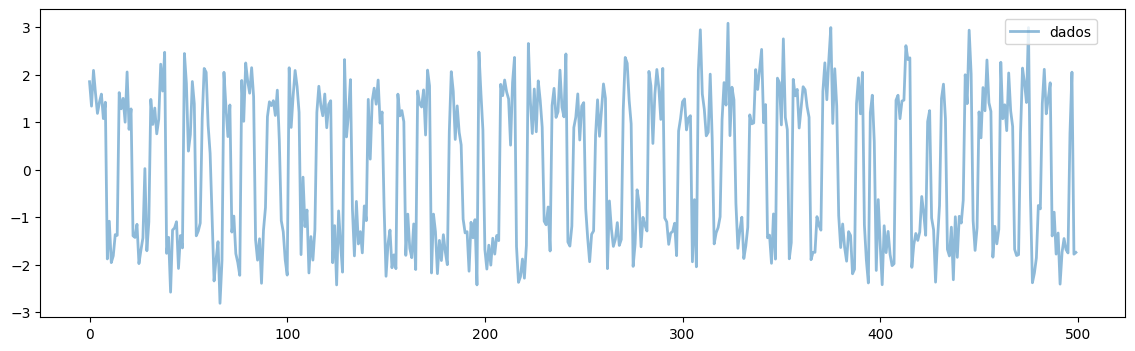

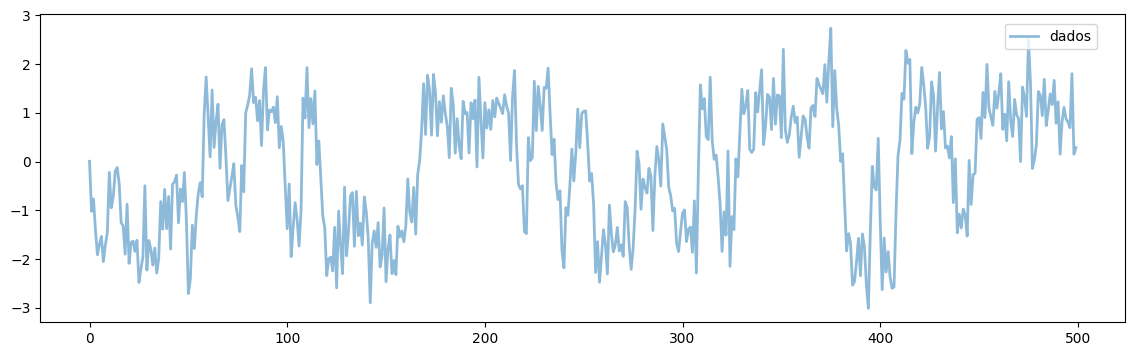

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
from scipy.signal import butter, sosfiltfilt

#carregando os dados
data1 = np.loadtxt('dados_01.dat')
data2 = np.loadtxt('dados_02.dat')

#dados 1
t1 = data1[:,0]
u1 = data1[:,1]
y1 = data1[:,2]
#dados 2
t2 = data2[:,0]
u2 = data2[:,1]
y2 = data2[:,2]

#Plotando os dados "brutos":
plt. figure(figsize = (14,4))
plt.plot(t1,y1, lw = 2, alpha = .5, label = 'dados')
plt.legend(loc = 'upper right', bbox_to_anchor = (.98,.99))
plt. figure(figsize = (14,4))
plt.plot(t2,y2, lw = 2, alpha = .5, label = 'dados')
plt.legend(loc = 'upper right', bbox_to_anchor = (.98,.99))
plt.show()

# Entradas

A lei de formação achada foi:


    x.append(y[i-1] + y[i-2] + u[i-1] + u[i-2] + np.sin(y[i-1]) + np.sign(u[i-1]) * u[i-1]**2)


In [ ]:
x1 = []
for i in range(2,len(t1),1):
  x1.append(y1[i-1]+y1[i-2]+u1[i-1]+u1[i-2]+np.sin(y1[i-1])+np.sign(u1[i-1])*u1[i-1]**2)
  print(x1, len(x1))

[15.40749684773494] 1
[15.40749684773494, 15.542779673338599] 2
[15.40749684773494, 15.542779673338599, 15.94938100533443] 3
[15.40749684773494, 15.542779673338599, 15.94938100533443, 14.969707812618056] 4
[15.40749684773494, 15.542779673338599, 15.94938100533443, 14.969707812618056, 14.836053415315696] 5
[15.40749684773494, 15.542779673338599, 15.94938100533443, 14.969707812618056, 14.836053415315696, 15.253913532762486] 6
[15.40749684773494, 15.542779673338599, 15.94938100533443, 14.969707812618056, 14.836053415315696, 15.253913532762486, 14.789801605286954] 7
[15.40749684773494, 15.542779673338599, 15.94938100533443, 14.969707812618056, 14.836053415315696, 15.253913532762486, 14.789801605286954, -2.7713080786506064] 8
[15.40749684773494, 15.542779673338599, 15.94938100533443, 14.969707812618056, 14.836053415315696, 15.253913532762486, 14.789801605286954, -2.7713080786506064, -12.666670819587694] 9
[15.40749684773494, 15.542779673338599, 15.94938100533443, 14.969707812618056, 14.8360

In [ ]:
x2 = []
for i in range(2,len(t2),1):
  x2.append(y2[i-1]+y2[i-2]+u2[i-1]+u2[i-2]+np.sin(y2[i-1])+np.sign(u2[i-1])*u2[i-1]**2)
  print(x2, len(x2))

[-3.3420325221324316] 1
[-3.3420325221324316, -3.9545762143179757] 2
[-3.3420325221324316, -3.9545762143179757, -4.6373827417927185] 3
[-3.3420325221324316, -3.9545762143179757, -4.6373827417927185, -5.739018828955827] 4
[-3.3420325221324316, -3.9545762143179757, -4.6373827417927185, -5.739018828955827, -6.0776649266956495] 5
[-3.3420325221324316, -3.9545762143179757, -4.6373827417927185, -5.739018828955827, -6.0776649266956495, -5.7092102368308995] 6
[-3.3420325221324316, -3.9545762143179757, -4.6373827417927185, -5.739018828955827, -6.0776649266956495, -5.7092102368308995, -5.949876987582491] 7
[-3.3420325221324316, -3.9545762143179757, -4.6373827417927185, -5.739018828955827, -6.0776649266956495, -5.7092102368308995, -5.949876987582491, -4.85060472010768] 8
[-3.3420325221324316, -3.9545762143179757, -4.6373827417927185, -5.739018828955827, -6.0776649266956495, -5.7092102368308995, -5.949876987582491, -4.85060472010768, -3.3293855084357453] 9
[-3.3420325221324316, -3.9545762143179757

Atrasando entradas:

In [ ]:
u1 = u1[2:]
u2 = u2[2:]
y1 = y1[2:]
y2 = y2[2:]
t1 = t1[2:]
t2 = t2[2:]

# Parametros

Achando/calculando o sigma que deve ser usado:

In [ ]:
import numpy as np

# Definindo uma função para calcular distâncias euclidianas entre pares entre pontos de dados
def calculate_sigma(features):
    distances = []
    for i in range(len(features)):
        for j in range(i + 1, len(features)):
            distances.append(np.linalg.norm(np.array(features[i]) - np.array(features[j])))

    #Calculando a distância média (aproximação para sigma)
    sigma = np.mean(distances)
    return sigma

# Calculando o sigma
sigma_x1 = calculate_sigma(x1)
print(f"Sigma encontrado: {sigma_x1}")

Sigma encontrado: 14.788056007732532


Determinando a quantidade de neurônios, os centros das gaussianas, e passando o sigma para o nosso algoritmo

In [ ]:
n = 4 #quantidade de neurônios da nossa rede neural
c = np.linspace(min(x1), max(x1), n) #centros das gaussianas
print(c)

sigma = 14.782186497790441

[-16.65660921  -5.46782244   5.72096432  16.90975109]


# Treinamento

Realizando o treinamento da nossa rede neural

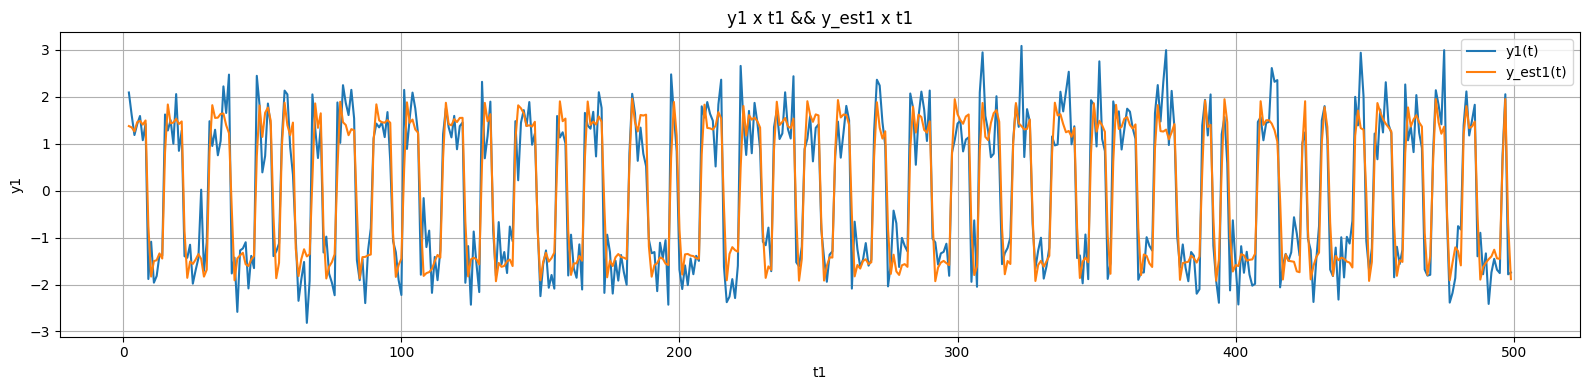

In [ ]:
Phi1 = np.zeros(shape = (len(x1), len(c)))
for i in range(Phi1.shape[0]):
  for j in range(Phi1.shape[1]):
    Phi1[i][j] = np.exp(-(2*sigma**2)**-1 * abs(x1[i] - c[j])**2)
w = la.pinv(Phi1) @ y1
y_est1 = Phi1 @ w

#Plotando o gráfico do modelo de treinamento da nossa rede neural
plt.figure(figsize=(16, 4))
plt.plot(t1, y1, label='y1(t)')
plt.plot(t1, y_est1, label='y_est1(t)')
plt.xlabel('t1')
plt.ylabel('y1')
plt.title('y1 x t1 && y_est1 x t1')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Erro quadrado do modelo de treinamento

Encontrando o erro quadrado "gerado" pelo nosso algoritmo na etapa de treinamento

In [ ]:
EQM1 = 0
for i in range(len(y1)):
  EQM1 += (y1[i] - y_est1[i])**2
EQM1 /= len(y1)
print(EQM1)

0.4097163788134824


# Testando o modelo com o nosso dataset 2 (dados_02.dat)

Feito o treinamento da nossa rede neural, vamos fazer a validação do modelo com os dados do dados_02.dat

Realizando uma pesquisa rápida, vemos que comumente a porcentagem do dataset usado para cada passo da rede neural é:
- 70% dos dados para treino.
- 15% dos dados para teste.
- 15% dos dados para validação.
Para a nossa rede neural, vamos apenas assumir que a nossa quantidade de dados de treino é consideravelmente maior que a quantidade de dados usado para teste

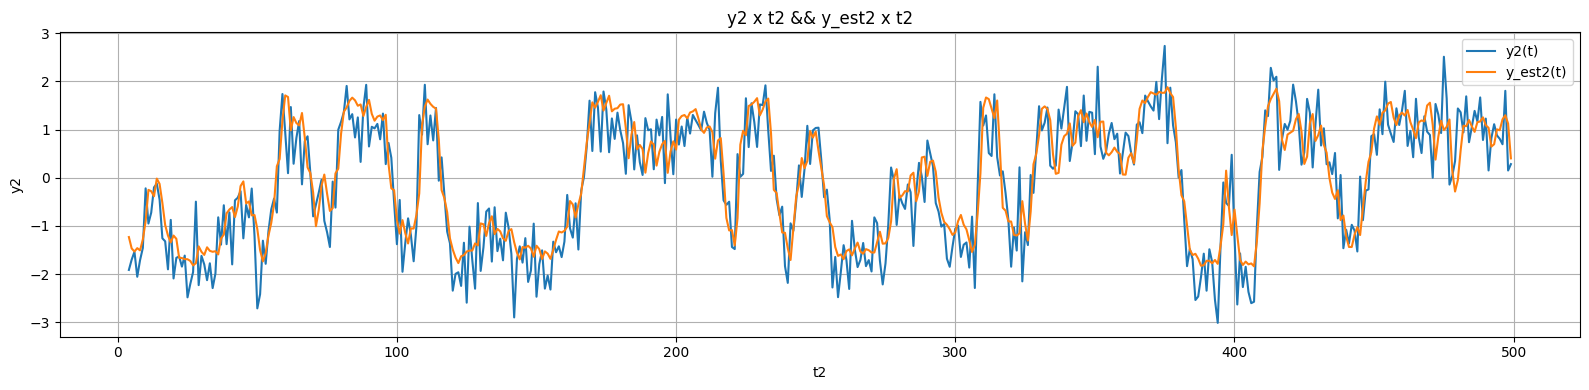

In [ ]:
Phi2 = np.zeros(shape = (len(x2), len(c)))
for i in range(Phi2.shape[0]):
  for j in range(Phi2.shape[1]):
    Phi2[i][j] = np.exp(-(2*sigma**2)**-1 * abs(x2[i] - c[j])**2)
y_est2 = Phi2 @ w

plt.figure(figsize=(16, 4))
plt.plot(t2, y2, label='y2(t)')
plt.plot(t2, y_est2, label='y_est2(t)')
plt.xlabel('t2')
plt.ylabel('y2')
plt.title('y2 x t2 && y_est2 x t2')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Erro quadrado do modelo de teste

Encontrando o erro quadrado "gerado" pelo nosso algoritmo na etapa de teste

In [ ]:
EQM2 = 0
for i in range(len(y2)):
  EQM2 += (y2[i] - y_est2[i])**2
EQM2 /= len(y2)
print(EQM2)

0.38956862179257046
